# Preprocessing for Machine Learning in Python

# DATACAMP

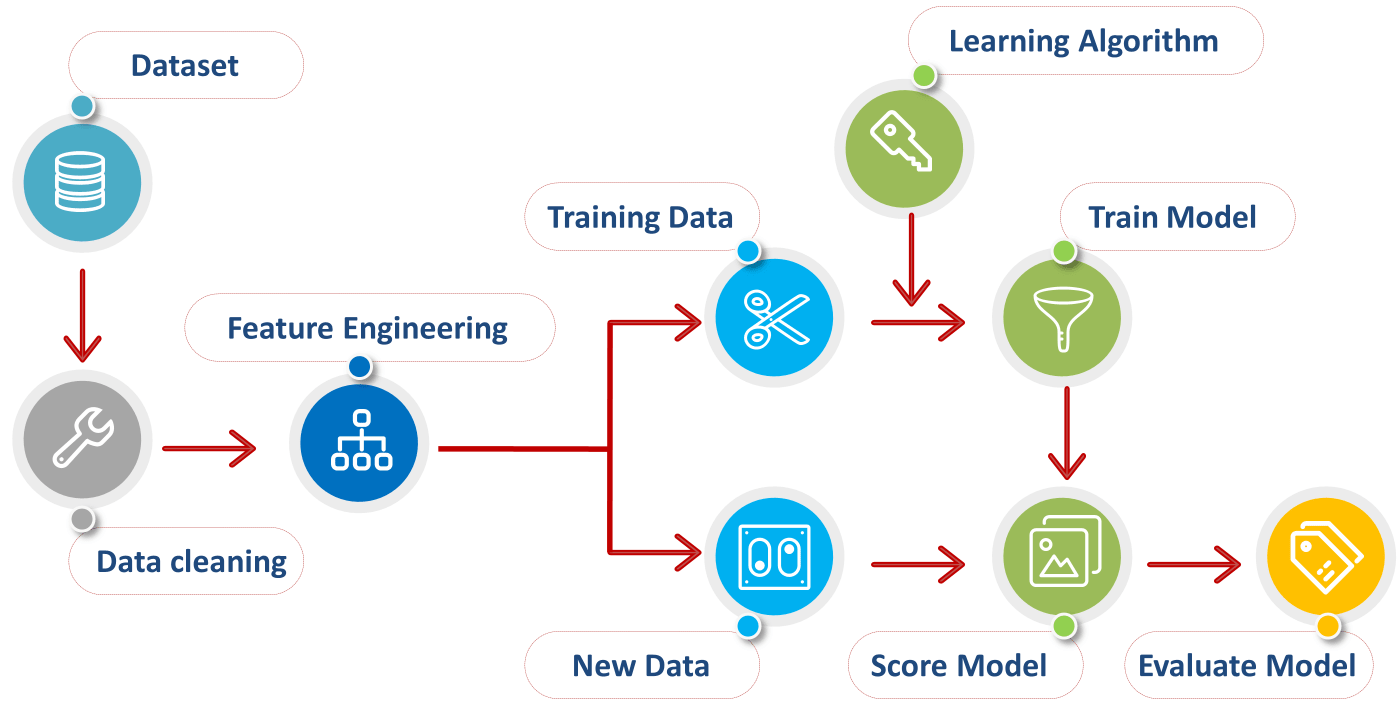

In [112]:
from IPython.display import Image
Image('dp.png')

# Course Description
This course covers the basics of how and when to perform data preprocessing. This essential step in any machine learning project is when you get your data ready for modeling. Between importing and cleaning your data and fitting your machine learning model is when preprocessing comes into play. You'll learn how to standardize your data so that it's in the right form for your model, create new features to best leverage the information in your dataset, and select the best features to improve your model fit. Finally, you'll have some practice preprocessing by getting a dataset on UFO sightings ready for modeling.

# 1. Introduction to Data Preprocessing

In this chapter you'll learn exactly what it means to preprocess data. You'll take the first steps in any preprocessing journey, including exploring data types and dealing with missing data.

In [113]:
import pandas as pd

In [114]:
url = 'https://assets.datacamp.com/production/repositories/1816/datasets/668b96955d8b252aa8439c7602d516634e3f015e/volunteer_opportunities.csv'
volunteer = pd.read_csv(url)

In [115]:
# Missing data - rows
# 
# Taking a look at the volunteer dataset again, we want to drop rows where the category_desc column values are missing. 
# We're going to do this using boolean indexing, by checking to see if we have any null values, 
# and then filtering the dataset so that we only have rows with those values.
# 
# Instructions
# 
# Check how many values are missing in the category_desc column using isnull() and sum().
# Subset the volunteer dataset by indexing by where category_desc is notnull(), 
# and store in a new variable called volunteer_subset.
# Take a look at the .shape attribute of the new dataset, to verify it worked correctly.

In [116]:
# Check how many values are missing in the category_desc column
print(volunteer['category_desc'].isnull().sum())

# Subset the volunteer dataset
volunteer_subset = volunteer[volunteer['category_desc'].notnull()]

# Print out the shape of the subset
print(volunteer_subset.shape)

48
(617, 35)


In [117]:
# Converting a column type
# 
# If you take a look at the volunteer dataset types, 
# you'll see that the column hits is type object. 
# But, if you actually look at the column, you'll see that it consists of integers. 
# Let's convert that column to type int.
# 
# Instructions
# 
# Take a look at the .head() of the hits column.
# Use the .astype function to convert the column to type int.
# Take a look at the dtypes of the dataset again, and notice that the column type has changed.

In [7]:
# Print the head of the hits column
print(volunteer["hits"].head())

# Convert the hits column to type int
volunteer["hits"] = volunteer["hits"].astype('int')

# Look at the dtypes of the dataset
print(volunteer.dtypes)

0    737
1     22
2     62
3     14
4     31
Name: hits, dtype: int64
opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int32
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64


In [ ]:
Stratified sampling

We know that the distribution of variables in the category_desc column in the volunteer dataset is uneven. If we wanted to train a model to try to predict category_desc, we would want to train the model on a sample of data that is representative of the entire dataset. Stratified sampling is a way to achieve this.

Instructions
100 XP
Instructions
100 XP
Create a volunteer_X dataset with all of the columns except category_desc.
Create a volunteer_y training labels dataset.
Split up the volunteer_X dataset using scikit-learn's train_test_split function and passing volunteer_y into the stratify= parameter.
Take a look at the category_desc value counts on the training labels.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Create a data with all columns except category_desc
volunteer_X = volunteer.drop("category_desc", axis=1)

# Create a category_desc labels dataset
volunteer_y = volunteer[["category_desc"]]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_test, y_train, y_test = train_test_split(volunteer_X, volunteer_y, stratify=volunteer_y)

# Print out the category_desc counts on the training y labels
print(y_train["category_desc"].value_counts())

Strengthening Communities    230
Helping Neighbors in Need     89
Education                     69
Health                        39
Environment                   24
Emergency Preparedness        11
Name: category_desc, dtype: int64


# 2. Standardizing Data

This chapter is all about standardizing data. Often a model will make some assumptions about the distribution or scale of your features. Standardization is a way to make your data fit these assumptions and improve the algorithm's performance.

In [ ]:
Modeling without normalizing
Let's take a look at what might happen to your model's accuracy if you try to model data without doing some sort of standardization first. Here we have a subset of the wine dataset. One of the columns, Proline, has an extremely high variance compared to the other columns. This is an example of where a technique like log normalization would come in handy, which you'll learn about in the next section.

The scikit-learn model training process should be familiar to you at this point, so we won't go too in-depth with it. You already have a k-nearest neighbors model available (knn) as well as the X and y sets you need to fit and score on.

Instructions
100 XP
Instructions
100 XP
Split up the X and y sets into training and test sets using train_test_split().
Use the knn model's fit() method on the X_train data and y_train labels, to fit the model to the data.
Print out the knn model's score() on the X_test data and y_test labels to evaluate the model.

In [10]:
url = 'https://assets.datacamp.com/production/repositories/1816/datasets/9bd5350dfdb481e0f94eeef6acf2663452a8ef8b/wine_types.csv'
wine = pd.read_csv(url)

In [12]:
y = wine['Type'] #.value_counts()
X = wine[['Proline', 'Total phenols', 'Hue', 'Nonflavanoid phenols']]
X.var()
# Proline has a huge variance, so it will affect the accuracy of the results

Proline                 99166.717355
Total phenols               0.391690
Hue                         0.052245
Nonflavanoid phenols        0.015489
dtype: float64

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.6


In [ ]:
Log normalization in Python
Now that we know that the Proline column in our wine dataset has a large amount of variance, let's log normalize it.

Numpy has been imported as np in your workspace.

Instructions
100 XP
Print out the variance of the Proline column for reference.
Use the np.log() function on the Proline column to create a new, log-normalized column named Proline_log.
Print out the variance of the Proline_log column to see the difference.

In [15]:
import numpy as np

In [16]:
# Print out the variance of the Proline column
print(wine['Proline'].var())

# Apply the log normalization function to the Proline column
wine['Proline_log'] = np.log(wine['Proline'])

# Check the variance of the normalized Proline column
print(wine['Proline_log'].var())

99166.71735542428
0.17231366191842018


In [ ]:
Scaling data - standardizing columns
Since we know that the Ash, Alcalinity of ash, and Magnesium columns in the wine dataset are all on different scales, let's standardize them in a way that allows for use in a linear model.

Instructions
100 XP
Instructions
100 XP
Import StandardScaler from sklearn.preprocessing.
Create the StandardScaler() method and store in a variable named ss.
Create a subset of the wine DataFrame of the Ash, Alcalinity of ash, and Magnesium columns, store in a variable named wine_subset.
Apply the ss.fit_transform method to the wine_subset DataFrame.

In [17]:
# This command is to avoid warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [18]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale 
wine_subset = wine[['Ash', 'Alcalinity of ash', 'Magnesium']]

# Apply the scaler to the DataFrame subset
wine_subset_scaled = ss.fit_transform(wine_subset)

In [ ]:
KNN on non-scaled data
Let's first take a look at the accuracy of a K-nearest neighbors model on the wine dataset without standardizing the data. The knn model as well as the X and y data and labels sets have been created already. Most of this process of creating models in scikit-learn should look familiar to you.

Instructions
100 XP
Split the dataset into training and test sets using train_test_split().
Use the knn model's fit() method on the X_train data and y_train labels, to fit the model to the data.
Print out the knn model's score() on the X_test data and y_test labels to evaluate the model.

In [19]:
X = wine[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y = wine['Type']

In [20]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.6666666666666666


In [ ]:
KNN on scaled data
The accuracy score on the unscaled wine dataset was decent, but we can likely do better if we scale the dataset. The process is mostly the same as the previous exercise, with the added step of scaling the data. Once again, the knn model as well as the X and y data and labels set have already been created for you.

Instructions
100 XP
Instructions
100 XP
Create the StandardScaler() method, stored in a variable named ss.
Apply the ss.fit_transform method to the X dataset.
Use the knn model's fit() method on the X_train data and y_train labels, to fit the model to the data.
Print out the knn model's score() on the X_test data and y_test labels to evaluate the model.

In [21]:
# Create the scaling method.
ss = StandardScaler()

# Apply the scaling method to the dataset used for modeling.
X_scaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

# Score the model on the test data.
print(knn.score(X_test, y_test))

0.9777777777777777


# Feature Engineering

In this section you'll learn about feature engineering. You'll explore different ways to create new, more useful, features from the ones already in your dataset. You'll see how to encode, aggregate, and extract information from both numerical and textual features.

In [ ]:
Encoding categorical variables - binary
Take a look at the hiking dataset. There are several columns here that need encoding, one of which is the Accessible column, which needs to be encoded in order to be modeled. Accessible is a binary feature, so it has two values - either Y or N - so it needs to be encoded into 1s and 0s. Use scikit-learn's LabelEncoder method to do that transformation.

Instructions
100 XP
Store LabelEncoder() in a variable named enc
Using the encoder's fit_transform() function, encode the hiking dataset's "Accessible" column. Call the new column Accessible_enc.
Compare the two columns side-by-side to see the encoding.

In [22]:
url = 'https://assets.datacamp.com/production/repositories/1816/datasets/4f26c48451bdbf73db8a58e226cd3d6b45cf7bb5/hiking.json'
hiking = pd.read_json(url)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking['Accessible_enc'] = enc.fit_transform(hiking[['Accessible']])

# Compare the two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0


In [ ]:
Encoding categorical variables - one-hot
One of the columns in the volunteer dataset, category_desc, gives category descriptions for the volunteer opportunities listed. Because it is a categorical variable with more than two categories, we need to use one-hot encoding to transform this column numerically. Use Pandas' get_dummies() function to do so.

Instructions
100 XP
Instructions
100 XP
Call get_dummies() on the volunteer["category_desc"] column to create the encoded columns and assign it to category_enc.
Print out the head() of the category_enc variable to take a look at the encoded columns.

In [25]:
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer["category_desc"])

# Take a look at the encoded columns
print(category_enc.head())

   Education  Emergency Preparedness  Environment  Health  \
0          0                       0            0       0   
1          0                       0            0       0   
2          0                       0            0       0   
3          0                       0            0       0   
4          0                       0            1       0   

   Helping Neighbors in Need  Strengthening Communities  
0                          0                          0  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          0  


In [ ]:
Engineering numerical features - taking an average
A good use case for taking an aggregate statistic to create a new feature is to take the mean of columns. Here, you have a DataFrame of running times named running_times_5k. For each name in the dataset, take the mean of their 5 run times.

Instructions
100 XP
Instructions
100 XP
Create a list of the columns you want to take the average of and store it in a variable named run_columns.
Use apply to take the mean() of the list of columns and remember to set axis=1. Use lambda row: in the apply.
Print out the DataFrame to see the mean column.

In [27]:
running_times_5k = pd.read_excel('df.xlsx',sheet_name='Hoja1') 

In [28]:
# Create a list of the columns to average
run_columns = ["run1", "run2", "run3", "run4", "run5"]

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)

      name  run1  run2  run3  run4  run5   mean
0      Sue  20.1  18.5  19.6  20.3  18.3  19.36
1     Mark  16.5  17.1  16.9  17.6  17.3  17.08
2     Sean  23.5  25.1  25.2  24.6  23.9  24.46
3     Erin  21.7  21.1  20.9  22.1  22.2  21.60
4    Jenny  25.8  27.1  26.1  26.7  26.9  26.52
5  Russell  30.9  29.6  31.4  30.4  29.9  30.44


In [ ]:
Engineering numerical features - datetime
There are several columns in the volunteer dataset comprised of datetimes. Let's take a look at the start_date_date column and extract just the month to use as a feature for modeling.

Instructions
100 XP
Use Pandas to_datetime() function on the volunteer["start_date_date"] column and store it in a new column called start_date_converted.
To retrieve just the month, apply a lambda function to volunteer["start_date_converted"] that grabs the .month attribute from the row. Store this in a new column called start_date_month.
Print the head() of just the start_date_converted and start_date_month columns.

In [29]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer['start_date_date'])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
print(volunteer[['start_date_converted', 'start_date_month']].head())

  start_date_converted  start_date_month
0           2011-07-30                 7
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2


In [ ]:
Engineering features from strings - extraction
The Length column in the hiking dataset is a column of strings, but contained in the column is the mileage for the hike. We're going to extract this mileage using regular expressions, and then use a lambda in Pandas to apply the extraction to the DataFrame.

Instructions
100 XP
Instructions
100 XP
Create a pattern that will extract numbers and decimals from text, using \d+ to get numbers and \. to get decimals, and pass it into re's compile function.
Use re's match function to search the text, passing in the pattern and the length text.
Use the matched mile's group() attribute to extract the matched pattern, making sure to match group 0, and pass it into float.
Apply the return_mileage() function to the hiking["Length"] column.

In [68]:
import re
url = 'https://assets.datacamp.com/production/repositories/1816/datasets/4f26c48451bdbf73db8a58e226cd3d6b45cf7bb5/hiking.json'
hiking = pd.read_json(url)
hiking["Length"] = hiking["Length"].astype(str)

In [69]:
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")
  
    # Search the text for matches
    mile = re.match(pattern, length)
  
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
      
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(lambda row: return_mileage(row))
print(hiking[["Length", "Length_num"]].head())

       Length  Length_num
0   0.8 miles        0.80
1    1.0 mile        1.00
2  0.75 miles        0.75
3   0.5 miles        0.50
4   0.5 miles        0.50


In [ ]:
Engineering features from strings - tf/idf
Let's transform the volunteer dataset's title column into a text vector, to use in a prediction task in the next exercise.

Instructions
100 XP
Store the volunteer["title"] column in a variable named title_text.
Use the tfidf_vec vectorizer's fit_transform() function on title_text to transform the text into a tf-idf vector.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
# Take the title text
title_text = volunteer["title"]

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

In [ ]:
Text classification using tf/idf vectors
Now that we've encoded the volunteer dataset's title column into tf/idf vectors, let's use those vectors to try to predict the category_desc column.

Instructions
100 XP
Instructions
100 XP
Using train_test_split, split the text_tfidf vector, along with your y variable, into training and test sets. Set the stratify parameter equal to y, since the class distribution is uneven. Notice that we have to run the toarray() method on the tf/idf vector, in order to get in it the proper format for scikit-learn.
Use Naive Bayes' fit() method on the X_train and y_train variables.
Print out the score() of the X_test and y_test variables.

In [71]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [72]:
volunteer["category_desc"] = volunteer["category_desc"].replace(np.nan, 'Strengthening Communities', regex=True)
#y = volunteer["category_desc"]
#df1 = df.replace(np.nan, '', regex=True)
#y

In [73]:
# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

0.49101796407185627


# 4. Selecting features for modeling

This chapter goes over a few different techniques for selecting the most important features from your dataset. You'll learn how to drop redundant features, work with text vectors, and reduce the number of features in your dataset using principal component analysis (PCA).

In [ ]:
Selecting relevant features
Now let's identify the redundant columns in the volunteer dataset and perform feature selection on the dataset to return a DataFrame of the relevant features.

For example, if you explore the volunteer dataset in the console, you'll see three features which are related to location: locality, region, and postalcode. They contain repeated information, so it would make sense to keep only one of the features.

There are also features that have gone through the feature engineering process: columns like Education and Emergency Preparedness are a product of encoding the categorical variable category_desc, so category_desc itself is redundant now.

Take a moment to examine the features of volunteer in the console, and try to identify the redundant features.

Instructions
100 XP
Create a list of redundant column names and store it in the to_drop variable:
Out of all the location-related features, keep only postcode.
Features that have gone through the feature engineering process are redundant as well.
Drop the columns from the dataset using .drop().
Print out the .head() of the DataFrame to see the selected columns.

In [64]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
print(volunteer_subset.head())

   opportunity_id  content_id  event_time  \
0            4996       37004           0   
1            5008       37036           0   
2            5016       37143           0   
3            5022       37237           0   
4            5055       37425           0   

                                               title  hits  \
0  Volunteers Needed For Rise Up & Stay Put! Home...   737   
1                                       Web designer    22   
2      Urban Adventures - Ice Skating at Lasker Rink    62   
3  Fight global hunger and support women farmers ...    14   
4                                      Stop 'N' Swap    31   

                                             summary is_priority  category_id  \
0  Building on successful events last summer and ...         NaN          NaN   
1             Build a website for an Afghan business         NaN          1.0   
2  Please join us and the students from Mott Hall...         NaN          1.0   
3  The Oxfam Action Corps is a g

In [ ]:
Checking for correlated features
Let's take a look at the wine dataset again, which is made up of continuous, numerical features. Run Pearson's correlation coefficient on the dataset to determine which columns are good candidates for eliminating. Then, remove those columns from the DataFrame.

Instructions
100 XP
Instructions
100 XP
Print out the column correlations of the wine dataset using corr().
Take a minute to look at the correlations. Identify a column where the correlation value is greater than 0.75 at least twice and store it in the to_drop variable.
Drop that column from the DataFrame using drop().

In [65]:
# Print out the column correlations of the wine dataset
print(wine.corr())

# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = "Flavanoids"

# Drop that column from the DataFrame
wine = wine.drop(to_drop, axis=1)

                                  Type   Alcohol  Malic acid       Ash  \
Type                          1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

In [ ]:
Exploring text vectors, part 1
Let's expand on the text vector exploration method we just learned about, 
using the volunteer dataset's title tf/idf vectors. 
In this first part of text vector exploration, 
we're going to add to that function we learned about in the slides. 
We'll return a list of numbers with the function. 
In the next exercise, we'll write another function to collect the top words across all documents, extract them, and then use that list to filter down our text_tfidf vector.

Instructions
100 XP
Instructions
100 XP
Add parameters called original_vocab, for the tfidf_vec.vocabulary_, and top_n.
Call pd.Series on the zipped dictionary. This will make it easier to operate on.
Use the sort_values function to sort the series and slice the index up to top_n words.
Call the function, setting original_vocab=tfidf_vec.vocabulary_, setting vector_index=8 to grab the 9th row, and setting top_n=3, to grab the top 3 weighted words.

In [88]:
vocab = {1048: 'web', 278: 'designer', 1017: 'urban', 38: 'adventures', 490: 'ice', 890: 'skating', 90: 'at', 559: 'lasker', 832: 'rink', 368: 'fight', 423: 'global', 487: 'hunger', 68: 'and', 944: 'support', 1061: 'women', 356: 'farmers', 535: 'join', 969: 'the', 708: 'oxfam', 27: 'action', 240: 'corps', 498: 'in', 680: 'nyc', 922: 'stop', 947: 'swap', 790: 'queens', 911: 'staff', 281: 'development', 992: 'trainer', 200: 'claro', 145: 'brooklyn', 1037: 'volunteer', 93: 'attorney', 221: 'community', 455: 'health', 43: 'advocates', 942: 'supervise', 189: 'children', 466: 'highland', 717: 'park', 409: 'garden', 1071: 'worldofmoney', 696: 'org', 1085: 'youth', 60: 'amazing', 791: 'race', 789: 'qualified', 133: 'board', 620: 'member', 860: 'seats', 98: 'available', 1083: 'young', 33: 'adult', 1006: 'tutor', 1016: 'updated', 11: '30', 0: '11', 513: 'insurance', 199: 'claims', 600: 'manager', 979: 'timebanksnyc', 432: 'great', 340: 'exchange', 205: 'clean', 1015: 'up', 81: 'asbury', 171: 'cementary', 918: 'staten', 524: 'island', 869: 'senior', 194: 'citizen', 392: 'friendly', 1033: 'visitor', 881: 'shop', 1000: 'tree', 161: 'care', 1068: 'workshop', 4: '20', 646: 'movie', 856: 'screener', 380: 'for', 870: 'seniors', 355: 'farm', 430: 'graphic', 691: 'open', 480: 'house', 416: 'get', 984: 'tools', 980: 'to', 806: 'recycling', 1039: 'volunteers', 660: 'needed', 353: 'family', 336: 'event', 207: 'clerical', 158: 'cancer', 1041: 'walk', 120: 'befitnyc', 739: 'physical', 30: 'activity', 700: 'organizers', 269: 'decision', 266: 'day', 5: '2011', 661: 'needs', 1084: 'your', 459: 'help', 405: 'gain', 1021: 'valuable', 245: 'counseling', 344: 'experience', 687: 'on', 845: 'samaritans', 9: '24', 479: 'hour', 255: 'crisis', 478: 'hotline', 457: 'heart', 407: 'gallery', 703: 'our', 503: 'info', 949: 'table', 373: 'finding', 471: 'homes', 542: 'kids', 1077: 'yiddish', 903: 'speaking', 472: 'homework', 460: 'helper', 892: 'skilled', 800: 'rebuilding', 982: 'together', 468: 'home', 818: 'repairs', 438: 'greenteam', 40: 'advetures', 940: 'summer', 931: 'streets', 1005: 'tuesday', 335: 'evenings', 1060: 'with', 612: 'masa', 594: 'lunch', 770: 'program', 1018: 'us', 706: 'outreach', 618: 'meals', 760: 'preparedness', 222: 'compost', 773: 'project', 613: 'master', 223: 'composter', 178: 'certificate', 249: 'course', 318: 'emblemhealth', 144: 'bronx', 683: 'of', 873: 'service', 531: 'jcc', 601: 'manhattan', 418: 'girl', 855: 'scout', 872: 'series', 296: 'dorot', 838: 'rosh', 452: 'hashanah', 709: 'package', 274: 'delivery', 713: 'painting', 511: 'instructor', 530: 'jasa', 464: 'hes', 172: 'center', 12: '3rd', 70: 'annual', 377: 'flyny', 548: 'kite', 366: 'festival', 983: 'tomorrow', 151: 'business', 566: 'leaders', 955: 'teach', 110: 'basics', 465: 'high', 852: 'schoolers', 410: 'gardening', 397: 'ft', 1004: 'tryon', 910: 'st', 610: 'martin', 748: 'poetry', 668: 'new', 1079: 'york', 216: 'college', 424: 'goal', 941: 'sunday', 361: 'february', 6: '2012', 262: 'dance', 8: '22nd', 560: 'latino', 604: 'march', 2: '17', 1013: 'university', 848: 'saturday', 1008: 'tutors', 744: 'planet', 485: 'human', 602: 'mapping', 420: 'give', 1050: 'week', 186: 'child', 569: 'learn', 796: 'read', 926: 'storytelling', 243: 'costume', 597: 'making', 912: 'stage', 277: 'design', 319: 'emergency', 351: 'fair', 17: '9th', 1053: 'west', 887: 'side', 248: 'county', 676: 'nutrition', 314: 'educator', 879: 'shape', 306: 'east', 13: '54st', 801: 'rec', 1046: 'water', 45: 'aerobics', 83: 'asser', 573: 'levy', 712: 'paint', 57: 'alongside', 783: 'publicolor', 936: 'students', 536: 'jumpstart', 797: 'readers', 564: 'lead', 252: 'crafts', 408: 'games', 348: 'face', 751: 'popcorn', 527: 'jackie', 835: 'robinson', 716: 'parent', 375: 'fitness', 916: 'starrett', 197: 'city', 585: 'line', 263: 'dancer', 615: 'math', 587: 'literacy', 114: 'be', 209: 'climb', 985: 'top', 608: 'marketing', 86: 'assistant', 313: 'education', 673: 'nonprofit', 867: 'seeks', 805: 'recruitment', 626: 'mentors', 810: 'register', 92: 'attend', 142: 'breakfast', 701: 'orientation', 529: 'january', 272: 'deliver', 1058: 'winter', 1031: 'visit', 65: 'an', 525: 'isolated', 342: 'exercise', 213: 'coach', 670: 'night', 115: 'beach', 180: 'change', 77: 'art', 772: 'programs', 229: 'consumer', 779: 'protection', 562: 'law', 589: 'liver', 579: 'life', 565: 'leader', 901: 'soup', 547: 'kitchen', 307: 'eastern', 534: 'john', 650: 'muir', 930: 'street', 1024: 'vendor', 641: 'monthly', 959: 'team', 367: 'fiesta', 977: 'throgs', 658: 'neck', 224: 'computer', 956: 'teacher', 567: 'leadership', 244: 'council', 693: 'opportunity', 231: 'conversation', 461: 'helpers', 427: 'grades', 714: 'pantry', 288: 'distribution', 305: 'earth', 960: 'tech', 1049: 'website', 692: 'opportunities', 175: 'cents', 19: 'ability', 203: 'classroom', 877: 'set', 146: 'brush', 545: 'kindness', 999: 'transportation', 58: 'alternatives', 129: 'bike', 1020: 'valet', 1026: 'video', 311: 'editing', 767: 'professionals', 921: 'stipend', 49: 'after', 851: 'school', 624: 'mentor', 666: 'networking', 138: 'bowling', 398: 'fun', 449: 'harlem', 555: 'lanes', 866: 'seeking', 1078: 'yoga', 902: 'spanish', 695: 'or', 389: 'french', 362: 'feed', 488: 'hungry', 1080: 'yorkers', 14: '55', 690: 'only', 735: 'phone', 106: 'bank', 819: 'representative', 795: 'reach', 704: 'out', 643: 'morris', 458: 'heights', 904: 'special', 155: 'camp', 946: 'susan', 551: 'komen', 259: 'cure', 433: 'greater', 47: 'affiliate', 303: 'dumbo', 79: 'arts', 698: 'organizational', 148: 'budget', 639: 'money', 596: 'makes', 871: 'sense', 994: 'training', 889: 'site', 1027: 'videographer', 376: 'fly', 152: 'by', 970: 'theater', 429: 'grant', 1074: 'writer', 745: 'planning', 778: 'proposal', 759: 'preparation', 399: 'fund', 793: 'raising', 450: 'harm', 808: 'reduction', 35: 'adv', 515: 'intern', 875: 'serving', 575: 'lgbt', 34: 'adults', 482: 'how', 830: 'ride', 130: 'bikes', 821: 'research', 401: 'fundraising', 280: 'developement', 233: 'cook', 840: 'row', 50: 'afterschool', 630: 'middle', 885: 'shower', 400: 'fundraisers', 526: 'it', 519: 'interpreters', 563: 'lawyers', 446: 'haitian', 18: 'abe', 757: 'pre', 412: 'ged', 640: 'monitor', 89: 'astoria', 634: 'million', 1001: 'trees', 421: 'giveaway', 290: 'do', 1081: 'you', 1044: 'want', 595: 'make', 283: 'difference', 204: 'classwish', 896: 'snow', 883: 'shoveling', 196: 'citizenship', 761: 'press', 586: 'list', 781: 'public', 813: 'relations', 743: 'plan', 829: 'review', 394: 'friendship', 753: 'positive', 121: 'beginnings', 546: 'kit', 611: 'mary', 803: 'recreation', 291: 'does', 697: 'organization', 659: 'need', 858: 'search', 928: 'strategy', 332: 'esl', 46: 'affected', 924: 'storm', 995: 'transform', 590: 'lives', 933: 'strengthen', 220: 'communities', 119: 'become', 302: 'driver', 1025: 'veterans', 191: 'chinese', 997: 'translator', 512: 'instructors', 653: 'museum', 621: 'membership', 275: 'department', 284: 'director', 117: 'beautify', 996: 'transitional', 822: 'residence', 470: 'homeless', 623: 'men', 953: 'tank', 517: 'internship', 774: 'projects', 841: 'run', 1056: 'wild', 139: 'boys', 475: 'hope', 419: 'girls', 219: 'communications', 792: 'raise', 100: 'awareness', 31: 'administrative', 56: 'alliance', 811: 'registrar', 647: 'ms', 1062: 'word', 162: 'career', 246: 'counselor', 722: 'passover', 304: 'early', 188: 'childhood', 149: 'build', 747: 'plastic', 137: 'bottle', 857: 'sculpture', 763: 'pride', 523: 'is', 538: 'just', 76: 'around', 238: 'corner', 520: 'involved', 675: 'now', 390: 'fresh', 53: 'air', 957: 'teachers', 372: 'find', 729: 'perfect', 533: 'job', 684: 'office', 1075: 'writing', 264: 'data', 326: 'entry', 29: 'activism', 738: 'photography', 843: 'salesforce', 265: 'database', 261: 'customization', 736: 'photo', 333: 'essay', 572: 'legal', 42: 'advisor', 467: 'hike', 974: 'thon', 236: 'coordinator', 558: 'laser', 950: 'tag', 298: 'dowling', 3: '175th', 505: 'information', 962: 'technology', 352: 'fall', 382: 'forest', 826: 'restoration', 541: 'kickoff', 1002: 'trevor', 582: 'lifeline', 247: 'counselors', 973: 'thomas', 532: 'jefferson', 614: 'materials', 1076: 'year', 386: 'founder', 341: 'executive', 453: 'haunted', 557: 'lantern', 989: 'tours', 383: 'fort', 986: 'totten', 657: 'national', 878: 'sexual', 82: 'assault', 689: 'online', 993: 'trainers', 48: 'african', 63: 'american', 210: 'clothing', 301: 'drive', 828: 'returning', 865: 'seeds', 939: 'success', 746: 'plant', 981: 'today', 443: 'growth', 1009: 'udec', 328: 'enviromedia', 636: 'mobile', 606: 'maritime', 102: 'bacchanal', 742: 'pirates', 365: 'fest', 492: 'ikea', 329: 'erie', 111: 'basin', 282: 'diabetes', 88: 'association', 364: 'feria', 267: 'de', 844: 'salud', 664: 'nepali', 105: 'bangla', 784: 'punjabi', 998: 'translators', 674: 'not', 769: 'profit', 741: 'pioneer', 159: 'capoeira', 1023: 'various', 752: 'positions', 287: 'dispatcher', 991: 'trainee', 506: 'ing', 603: 'marathon', 388: 'free', 593: 'love', 135: 'books', 268: 'dear', 96: 'authors', 52: 'aide', 850: 'scheuer', 627: 'merchandise', 293: 'donate', 943: 'supplies', 360: 'feast', 406: 'gala', 112: 'battery', 833: 'rise', 919: 'stay', 787: 'put', 820: 'rescue', 897: 'soccer', 402: 'futsal', 730: 'performing', 36: 'advanced', 202: 'classes', 1070: 'world', 854: 'science', 1054: 'western', 64: 'americorps', 25: 'aces', 310: 'economic', 864: 'security', 507: 'initiative', 331: 'esi', 633: 'mill', 173: 'centers', 631: 'midtown', 1088: 'zumba', 1030: 'vision', 635: 'mission', 66: 'analysis', 552: 'lab', 958: 'teaching', 84: 'assist', 827: 'resume', 150: 'building', 899: 'society', 214: 'coaches', 1040: 'vs', 218: 'committee', 842: 'russian', 385: 'foster', 170: 'celebration', 616: 'may', 7: '21th', 688: 'one', 711: 'pager', 294: 'donation', 489: 'hurricane', 521: 'irene', 354: 'far', 836: 'rockaway', 325: 'enjoy', 1066: 'working', 686: 'olympics', 988: 'tournament', 798: 'reading', 719: 'partners', 234: 'cooper', 909: 'square', 975: 'thrift', 908: 'spring', 166: 'case', 599: 'management', 404: 'fvcp', 990: 'trail', 254: 'crew', 447: 'halloween', 165: 'carnival', 1042: 'walkathon', 359: 'feasibility', 67: 'analyst', 749: 'police', 868: 'seminar', 1064: 'work', 1035: 'visually', 496: 'impaired', 964: 'teens', 972: 'this', 322: 'energy', 315: 'efficiency', 321: 'end', 859: 'season', 156: 'campaign', 123: 'benefits', 802: 'reception', 300: 'drill', 237: 'copywriting', 235: 'coord', 454: 'have', 725: 'penchant', 55: 'all', 971: 'things', 1028: 'vintage', 976: 'thriftshop', 718: 'partner', 726: 'pencil', 720: 'partnership', 710: 'packing', 16: '8th', 907: 'sports', 346: 'expo', 164: 'cares', 184: 'cheerleaders', 1045: 'wanted', 445: 'habitat', 371: 'finance', 215: 'coffee', 324: 'english', 755: 'practice', 570: 'learners', 456: 'healthy', 28: 'active', 978: 'time', 122: 'benefit', 73: 'april', 357: 'fashion', 929: 'strawberry', 87: 'assistants', 174: 'central', 1087: 'zoo', 1: '125th', 127: 'bideawee', 440: 'greeters', 592: 'looking', 799: 'real', 495: 'impact', 504: 'inform', 728: 'people', 756: 'practices', 580: 'lifebeat', 413: 'general', 932: 'streetsquash', 286: 'discovery', 874: 'services', 663: 'neighborhood', 768: 'profiles', 951: 'take', 915: 'stand', 51: 'against', 1029: 'violence', 345: 'expert', 41: 'advice', 537: 'june', 849: 'schedule', 258: 'crowdfunding', 727: 'penny', 451: 'harvest', 434: 'green', 185: 'chefs', 677: 'nutritionists', 379: 'foodies', 625: 'mentoring', 136: 'boom', 669: 'newsletter', 217: 'come', 934: 'strides', 1043: 'walks', 187: 'childcare', 898: 'social', 619: 'media', 422: 'giving', 157: 'can', 61: 'ambassador', 10: '2nd', 967: 'thanksgiving', 363: 'feeding', 662: 'needy', 782: 'publicity', 723: 'patient', 163: 'caregiver', 1032: 'visiting', 469: 'homebound', 358: 'fc', 679: 'nyawc', 384: 'forum', 21: 'about', 1038: 'volunteering', 809: 'refreshments', 847: 'sara', 837: 'roosevelt', 206: 'cleanup', 116: 'beautification', 337: 'events', 69: 'animal', 484: 'hudson', 834: 'river', 605: 'mariners', 825: 'response', 343: 'exhibit', 20: 'aboard', 584: 'lilac', 208: 'client', 1052: 'welcome', 279: 'desk', 685: 'older', 574: 'lexington', 251: 'craft', 750: 'poll', 1065: 'workers', 518: 'interperters', 24: 'accounting', 85: 'assistance', 477: 'hosting', 776: 'promotion', 1011: 'unicef', 954: 'tap', 814: 'release', 270: 'dedication', 771: 'programming', 500: 'incarnation', 295: 'donor', 544: 'kieran', 906: 'sponsorship', 1069: 'workshops', 118: 'because', 338: 'every', 276: 'deserves', 179: 'chance', 740: 'pin', 273: 'delivered', 886: 'shred', 15: '5th', 99: 'avenue', 169: 'cdsc', 917: 'starving', 78: 'artist', 884: 'show', 948: 'system', 396: 'front', 880: 'share', 553: 'lanch', 935: 'student', 463: 'hemophilia', 577: 'liason', 629: 'methodist', 476: 'hospital', 113: 'bay', 831: 'ridge', 124: 'benonhurst', 75: 'area', 900: 'sought', 97: 'autistic', 297: 'douglaston', 788: 'qns', 812: 'registration', 32: 'administrator', 153: 'call', 426: 'governor', 804: 'recruiter', 786: 'purim', 327: 'envelope', 938: 'stuffing', 528: 'jam', 462: 'helpline', 923: 'store', 374: 'first', 415: 'generation', 1022: 'van', 241: 'cortlandt', 816: 'remembrance', 945: 'survey', 823: 'resonations', 143: 'breast', 323: 'engine', 694: 'optimization', 622: 'memorial', 894: 'sloan', 540: 'kettering', 435: 'greenhouse', 436: 'greening', 227: 'concert', 334: 'evacuation', 824: 'resources', 417: 'gift', 126: 'bicycling', 656: 'my', 393: 'friends', 473: 'honor', 1051: 'weekend', 731: 'person', 651: 'mural', 312: 'editor', 732: 'personal', 882: 'shopper', 764: 'pro', 134: 'bono', 253: 'create', 160: 'cards', 920: 'step', 672: 'non', 780: 'provider', 516: 'interns', 645: 'motion', 431: 'graphics', 125: 'best', 147: 'buddies', 502: 'inern', 103: 'back', 588: 'little', 242: 'cosmetologist', 107: 'barber', 1036: 'vocational', 72: 'apartment', 439: 'greeter', 766: 'professional', 1019: 'use', 893: 'skills', 702: 'others', 369: 'figure', 257: 'croton', 190: 'chinatown', 193: 'ci', 758: 'prep', 239: 'corporate', 1063: 'wordpress', 132: 'blog', 510: 'instructer', 807: 'red', 474: 'hook', 289: 'divert', 966: 'textiles', 395: 'from', 554: 'landfill', 437: 'greenmarket', 965: 'textile', 154: 'calling', 195: 'citizens', 497: 'improve', 26: 'achievement', 721: 'passion', 481: 'housing', 1067: 'works', 499: 'inc', 441: 'group', 299: 'drama', 561: 'laundromats', 320: 'employment', 927: 'strategic', 667: 'never', 104: 'bad', 391: 'friend', 403: 'future', 201: 'class', 1059: 'wish', 387: 'fpcj', 1072: 'worship', 1010: 'undergraduate', 428: 'graduate', 228: 'conference', 1047: 'we', 775: 'promote', 550: 'knowledge', 715: 'parade', 74: 'archivist', 425: 'google', 44: 'adwords', 493: 'imentor', 642: 'more', 598: 'male', 632: 'miles', 637: 'moms', 183: 'charity', 176: 'century', 987: 'tour', 198: 'civil', 724: 'patrol', 62: 'america', 539: 'kept', 862: 'secret', 648: 'ms131', 549: 'knitter', 256: 'crochet', 131: 'blankets', 177: 'ceo', 591: 'logo', 1012: 'unique', 1057: 'will', 128: 'big', 37: 'adventure', 23: 'accountant', 876: 'session', 888: 'single', 644: 'mothers', 192: 'choice', 895: 'smc', 1055: 'wii', 705: 'outdoor', 671: 'nights', 607: 'market', 514: 'intake', 638: 'monday', 141: 'branding', 140: 'brand', 491: 'identity', 649: 'mt', 1086: 'zion', 543: 'kidz', 817: 'reorganize', 578: 'library', 378: 'food', 91: 'athletic', 568: 'league', 655: 'musician', 59: 'alzheimer', 654: 'music', 109: 'bash', 765: 'proctor', 952: 'taking', 339: 'exams', 777: 'promotional', 733: 'personnel', 95: 'august', 891: 'skill', 665: 'networker', 309: 'ecological', 785: 'puppet', 501: 'income', 414: 'generating', 699: 'organizations', 250: 'cpr', 576: 'lgbtq', 317: 'el', 652: 'museo', 271: 'del', 108: 'barrio', 628: 'met', 330: 'escort', 846: 'sand', 167: 'castle', 230: 'contest', 853: 'schools', 486: 'humanities', 80: 'as', 861: 'second', 556: 'language', 101: 'babies', 963: 'teen', 54: 'al', 682: 'oerter', 483: 'html', 260: 'curriculum', 737: 'photographer', 863: 'secretary', 754: 'pr', 1073: 'would', 583: 'like', 225: 'computers', 961: 'technical', 442: 'grownyc', 968: 'that', 347: 'extraordinary', 381: 'foreclosure', 762: 'prevention', 681: 'nylag', 678: 'ny', 226: 'concern', 509: 'inspire', 22: 'academic', 1007: 'tutoring', 794: 'rbi', 71: 'anyone', 211: 'cma', 212: 'cms', 232: 'conversion', 308: 'eating', 571: 'learning', 181: 'chaperones', 1034: 'visits', 411: 'gear', 1014: 'unlimited', 581: 'lifeguard', 350: 'facilitators', 1003: 'troop', 839: 'route', 609: 'marshall', 508: 'inmotion', 925: 'story', 913: 'stair', 292: 'domestic', 168: 'catskills', 815: 'relief', 316: 'effort', 94: 'audience', 734: 'pharmacy', 444: 'guide', 707: 'overnight', 494: 'immediate', 285: 'dirty', 448: 'hands', 349: 'facilitator', 905: 'specialist', 182: 'chapter', 914: 'stamps', 522: 'iridescent', 937: 'studio', 39: 'advertising', 370: 'filmmakers', 617: 'mayor', 1082: 'youcantoo'}

In [89]:
# Add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, 8, 3))

[23, 188, 562]


In [ ]:
Exploring text vectors, part 2
Using the function we wrote in the previous exercise,
we're going to extract the top words from each document in the text vector, 
return a list of the word indices, and use that list to filter the text vector down to those top words.

Instructions
100 XP
Instructions
100 XP
Call return_weights to return the top weighted words for that document.
Call set on the returned filter_list so we don't get duplicated numbers.
Call words_to_filter, passing in the following parameters: vocab for the vocab parameter, tfidf_vec.vocabulary_ for the original_vocab parameter, text_tfidf for the vector parameter, and 3 to grab the top_n 3 weighted words from each document.
Finally, pass that filtered_words set into a list to use as a filter for the text vector.

In [84]:
#tfidf_vec.vocabulary_ = {'web': 1048, 'designer': 278, 'urban': 1017, 'adventures': 38, 'ice': 490, 'skating': 890, 'at': 90, 'lasker': 559, 'rink': 832, 'fight': 368, 'global': 423, 'hunger': 487, 'and': 68, 'support': 944, 'women': 1061, 'farmers': 356, 'join': 535, 'the': 969, 'oxfam': 708, 'action': 27, 'corps': 240, 'in': 498, 'nyc': 680, 'stop': 922, 'swap': 947, 'queens': 790, 'staff': 911, 'development': 281, 'trainer': 992, 'claro': 200, 'brooklyn': 145, 'volunteer': 1037, 'attorney': 93, 'community': 221, 'health': 455, 'advocates': 43, 'supervise': 942, 'children': 189, 'highland': 466, 'park': 717, 'garden': 409, 'worldofmoney': 1071, 'org': 696, 'youth': 1085, 'amazing': 60, 'race': 791, 'qualified': 789, 'board': 133, 'member': 620, 'seats': 860, 'available': 98, 'young': 1083, 'adult': 33, 'tutor': 1006, 'updated': 1016, '30': 11, '11': 0, 'insurance': 513, 'claims': 199, 'manager': 600, 'timebanksnyc': 979, 'great': 432, 'exchange': 340, 'clean': 205, 'up': 1015, 'asbury': 81, 'cementary': 171, 'staten': 918, 'island': 524, 'senior': 869, 'citizen': 194, 'friendly': 392, 'visitor': 1033, 'shop': 881, 'tree': 1000, 'care': 161, 'workshop': 1068, '20': 4, 'movie': 646, 'screener': 856, 'for': 380, 'seniors': 870, 'farm': 355, 'graphic': 430, 'open': 691, 'house': 480, 'get': 416, 'tools': 984, 'to': 980, 'recycling': 806, 'volunteers': 1039, 'needed': 660, 'family': 353, 'event': 336, 'clerical': 207, 'cancer': 158, 'walk': 1041, 'befitnyc': 120, 'physical': 739, 'activity': 30, 'organizers': 700, 'decision': 269, 'day': 266, '2011': 5, 'needs': 661, 'your': 1084, 'help': 459, 'gain': 405, 'valuable': 1021, 'counseling': 245, 'experience': 344, 'on': 687, 'samaritans': 845, '24': 9, 'hour': 479, 'crisis': 255, 'hotline': 478, 'heart': 457, 'gallery': 407, 'our': 703, 'info': 503, 'table': 949, 'finding': 373, 'homes': 471, 'kids': 542, 'yiddish': 1077, 'speaking': 903, 'homework': 472, 'helper': 460, 'skilled': 892, 'rebuilding': 800, 'together': 982, 'home': 468, 'repairs': 818, 'greenteam': 438, 'advetures': 40, 'summer': 940, 'streets': 931, 'tuesday': 1005, 'evenings': 335, 'with': 1060, 'masa': 612, 'lunch': 594, 'program': 770, 'us': 1018, 'outreach': 706, 'meals': 618, 'preparedness': 760, 'compost': 222, 'project': 773, 'master': 613, 'composter': 223, 'certificate': 178, 'course': 249, 'emblemhealth': 318, 'bronx': 144, 'of': 683, 'service': 873, 'jcc': 531, 'manhattan': 601, 'girl': 418, 'scout': 855, 'series': 872, 'dorot': 296, 'rosh': 838, 'hashanah': 452, 'package': 709, 'delivery': 274, 'painting': 713, 'instructor': 511, 'jasa': 530, 'hes': 464, 'center': 172, '3rd': 12, 'annual': 70, 'flyny': 377, 'kite': 548, 'festival': 366, 'tomorrow': 983, 'business': 151, 'leaders': 566, 'teach': 955, 'basics': 110, 'high': 465, 'schoolers': 852, 'gardening': 410, 'ft': 397, 'tryon': 1004, 'st': 910, 'martin': 610, 'poetry': 748, 'new': 668, 'york': 1079, 'college': 216, 'goal': 424, 'sunday': 941, 'february': 361, '2012': 6, 'dance': 262, '22nd': 8, 'latino': 560, 'march': 604, '17': 2, 'university': 1013, 'saturday': 848, 'tutors': 1008, 'planet': 744, 'human': 485, 'mapping': 602, 'give': 420, 'week': 1050, 'child': 186, 'learn': 569, 'read': 796, 'storytelling': 926, 'costume': 243, 'making': 597, 'stage': 912, 'design': 277, 'emergency': 319, 'fair': 351, '9th': 17, 'west': 1053, 'side': 887, 'county': 248, 'nutrition': 676, 'educator': 314, 'shape': 879, 'east': 306, '54st': 13, 'rec': 801, 'water': 1046, 'aerobics': 45, 'asser': 83, 'levy': 573, 'paint': 712, 'alongside': 57, 'publicolor': 783, 'students': 936, 'jumpstart': 536, 'readers': 797, 'lead': 564, 'crafts': 252, 'games': 408, 'face': 348, 'popcorn': 751, 'jackie': 527, 'robinson': 835, 'parent': 716, 'fitness': 375, 'starrett': 916, 'city': 197, 'line': 585, 'dancer': 263, 'math': 615, 'literacy': 587, 'be': 114, 'climb': 209, 'top': 985, 'marketing': 608, 'assistant': 86, 'education': 313, 'nonprofit': 673, 'seeks': 867, 'recruitment': 805, 'mentors': 626, 'register': 810, 'attend': 92, 'breakfast': 142, 'orientation': 701, 'january': 529, 'deliver': 272, 'winter': 1058, 'visit': 1031, 'an': 65, 'isolated': 525, 'exercise': 342, 'coach': 213, 'night': 670, 'beach': 115, 'change': 180, 'art': 77, 'programs': 772, 'consumer': 229, 'protection': 779, 'law': 562, 'liver': 589, 'life': 579, 'leader': 565, 'soup': 901, 'kitchen': 547, 'eastern': 307, 'john': 534, 'muir': 650, 'street': 930, 'vendor': 1024, 'monthly': 641, 'team': 959, 'fiesta': 367, 'throgs': 977, 'neck': 658, 'computer': 224, 'teacher': 956, 'leadership': 567, 'council': 244, 'opportunity': 693, 'conversation': 231, 'helpers': 461, 'grades': 427, 'pantry': 714, 'distribution': 288, 'earth': 305, 'tech': 960, 'website': 1049, 'opportunities': 692, 'cents': 175, 'ability': 19, 'classroom': 203, 'set': 877, 'brush': 146, 'kindness': 545, 'transportation': 999, 'alternatives': 58, 'bike': 129, 'valet': 1020, 'video': 1026, 'editing': 311, 'professionals': 767, 'stipend': 921, 'after': 49, 'school': 851, 'mentor': 624, 'networking': 666, 'bowling': 138, 'fun': 398, 'harlem': 449, 'lanes': 555, 'seeking': 866, 'yoga': 1078, 'spanish': 902, 'or': 695, 'french': 389, 'feed': 362, 'hungry': 488, 'yorkers': 1080, '55': 14, 'only': 690, 'phone': 735, 'bank': 106, 'representative': 819, 'reach': 795, 'out': 704, 'morris': 643, 'heights': 458, 'special': 904, 'camp': 155, 'susan': 946, 'komen': 551, 'cure': 259, 'greater': 433, 'affiliate': 47, 'dumbo': 303, 'arts': 79, 'organizational': 698, 'budget': 148, 'money': 639, 'makes': 596, 'sense': 871, 'training': 994, 'site': 889, 'videographer': 1027, 'fly': 376, 'by': 152, 'theater': 970, 'grant': 429, 'writer': 1074, 'planning': 745, 'proposal': 778, 'preparation': 759, 'fund': 399, 'raising': 793, 'harm': 450, 'reduction': 808, 'adv': 35, 'intern': 515, 'serving': 875, 'lgbt': 575, 'adults': 34, 'how': 482, 'ride': 830, 'bikes': 130, 'research': 821, 'fundraising': 401, 'developement': 280, 'cook': 233, 'row': 840, 'afterschool': 50, 'middle': 630, 'shower': 885, 'fundraisers': 400, 'it': 526, 'interpreters': 519, 'lawyers': 563, 'haitian': 446, 'abe': 18, 'pre': 757, 'ged': 412, 'monitor': 640, 'astoria': 89, 'million': 634, 'trees': 1001, 'giveaway': 421, 'do': 290, 'you': 1081, 'want': 1044, 'make': 595, 'difference': 283, 'classwish': 204, 'snow': 896, 'shoveling': 883, 'citizenship': 196, 'press': 761, 'list': 586, 'public': 781, 'relations': 813, 'plan': 743, 'review': 829, 'friendship': 394, 'positive': 753, 'beginnings': 121, 'kit': 546, 'mary': 611, 'recreation': 803, 'does': 291, 'organization': 697, 'need': 659, 'search': 858, 'strategy': 928, 'esl': 332, 'affected': 46, 'storm': 924, 'transform': 995, 'lives': 590, 'strengthen': 933, 'communities': 220, 'become': 119, 'driver': 302, 'veterans': 1025, 'chinese': 191, 'translator': 997, 'instructors': 512, 'museum': 653, 'membership': 621, 'department': 275, 'director': 284, 'beautify': 117, 'transitional': 996, 'residence': 822, 'homeless': 470, 'men': 623, 'tank': 953, 'internship': 517, 'projects': 774, 'run': 841, 'wild': 1056, 'boys': 139, 'hope': 475, 'girls': 419, 'communications': 219, 'raise': 792, 'awareness': 100, 'administrative': 31, 'alliance': 56, 'registrar': 811, 'ms': 647, 'word': 1062, 'career': 162, 'counselor': 246, 'passover': 722, 'early': 304, 'childhood': 188, 'build': 149, 'plastic': 747, 'bottle': 137, 'sculpture': 857, 'pride': 763, 'is': 523, 'just': 538, 'around': 76, 'corner': 238, 'involved': 520, 'now': 675, 'fresh': 390, 'air': 53, 'teachers': 957, 'find': 372, 'perfect': 729, 'job': 533, 'office': 684, 'writing': 1075, 'data': 264, 'entry': 326, 'activism': 29, 'photography': 738, 'salesforce': 843, 'database': 265, 'customization': 261, 'photo': 736, 'essay': 333, 'legal': 572, 'advisor': 42, 'hike': 467, 'thon': 974, 'coordinator': 236, 'laser': 558, 'tag': 950, 'dowling': 298, '175th': 3, 'information': 505, 'technology': 962, 'fall': 352, 'forest': 382, 'restoration': 826, 'kickoff': 541, 'trevor': 1002, 'lifeline': 582, 'counselors': 247, 'thomas': 973, 'jefferson': 532, 'materials': 614, 'year': 1076, 'founder': 386, 'executive': 341, 'haunted': 453, 'lantern': 557, 'tours': 989, 'fort': 383, 'totten': 986, 'national': 657, 'sexual': 878, 'assault': 82, 'online': 689, 'trainers': 993, 'african': 48, 'american': 63, 'clothing': 210, 'drive': 301, 'returning': 828, 'seeds': 865, 'success': 939, 'plant': 746, 'today': 981, 'growth': 443, 'udec': 1009, 'enviromedia': 328, 'mobile': 636, 'maritime': 606, 'bacchanal': 102, 'pirates': 742, 'fest': 365, 'ikea': 492, 'erie': 329, 'basin': 111, 'diabetes': 282, 'association': 88, 'feria': 364, 'de': 267, 'salud': 844, 'nepali': 664, 'bangla': 105, 'punjabi': 784, 'translators': 998, 'not': 674, 'profit': 769, 'pioneer': 741, 'capoeira': 159, 'various': 1023, 'positions': 752, 'dispatcher': 287, 'trainee': 991, 'ing': 506, 'marathon': 603, 'free': 388, 'love': 593, 'books': 135, 'dear': 268, 'authors': 96, 'aide': 52, 'scheuer': 850, 'merchandise': 627, 'donate': 293, 'supplies': 943, 'feast': 360, 'gala': 406, 'battery': 112, 'rise': 833, 'stay': 919, 'put': 787, 'rescue': 820, 'soccer': 897, 'futsal': 402, 'performing': 730, 'advanced': 36, 'classes': 202, 'world': 1070, 'science': 854, 'western': 1054, 'americorps': 64, 'aces': 25, 'economic': 310, 'security': 864, 'initiative': 507, 'esi': 331, 'mill': 633, 'centers': 173, 'midtown': 631, 'zumba': 1088, 'vision': 1030, 'mission': 635, 'analysis': 66, 'lab': 552, 'teaching': 958, 'assist': 84, 'resume': 827, 'building': 150, 'society': 899, 'coaches': 214, 'vs': 1040, 'committee': 218, 'russian': 842, 'foster': 385, 'celebration': 170, 'may': 616, '21th': 7, 'one': 688, 'pager': 711, 'donation': 294, 'hurricane': 489, 'irene': 521, 'far': 354, 'rockaway': 836, 'enjoy': 325, 'working': 1066, 'olympics': 686, 'tournament': 988, 'reading': 798, 'partners': 719, 'cooper': 234, 'square': 909, 'thrift': 975, 'spring': 908, 'case': 166, 'management': 599, 'fvcp': 404, 'trail': 990, 'crew': 254, 'halloween': 447, 'carnival': 165, 'walkathon': 1042, 'feasibility': 359, 'analyst': 67, 'police': 749, 'seminar': 868, 'work': 1064, 'visually': 1035, 'impaired': 496, 'teens': 964, 'this': 972, 'energy': 322, 'efficiency': 315, 'end': 321, 'season': 859, 'campaign': 156, 'benefits': 123, 'reception': 802, 'drill': 300, 'copywriting': 237, 'coord': 235, 'have': 454, 'penchant': 725, 'all': 55, 'things': 971, 'vintage': 1028, 'thriftshop': 976, 'partner': 718, 'pencil': 726, 'partnership': 720, 'packing': 710, '8th': 16, 'sports': 907, 'expo': 346, 'cares': 164, 'cheerleaders': 184, 'wanted': 1045, 'habitat': 445, 'finance': 371, 'coffee': 215, 'english': 324, 'practice': 755, 'learners': 570, 'healthy': 456, 'active': 28, 'time': 978, 'benefit': 122, 'april': 73, 'fashion': 357, 'strawberry': 929, 'assistants': 87, 'central': 174, 'zoo': 1087, '125th': 1, 'bideawee': 127, 'greeters': 440, 'looking': 592, 'real': 799, 'impact': 495, 'inform': 504, 'people': 728, 'practices': 756, 'lifebeat': 580, 'general': 413, 'streetsquash': 932, 'discovery': 286, 'services': 874, 'neighborhood': 663, 'profiles': 768, 'take': 951, 'stand': 915, 'against': 51, 'violence': 1029, 'expert': 345, 'advice': 41, 'june': 537, 'schedule': 849, 'crowdfunding': 258, 'penny': 727, 'harvest': 451, 'green': 434, 'chefs': 185, 'nutritionists': 677, 'foodies': 379, 'mentoring': 625, 'boom': 136, 'newsletter': 669, 'come': 217, 'strides': 934, 'walks': 1043, 'childcare': 187, 'social': 898, 'media': 619, 'giving': 422, 'can': 157, 'ambassador': 61, '2nd': 10, 'thanksgiving': 967, 'feeding': 363, 'needy': 662, 'publicity': 782, 'patient': 723, 'caregiver': 163, 'visiting': 1032, 'homebound': 469, 'fc': 358, 'nyawc': 679, 'forum': 384, 'about': 21, 'volunteering': 1038, 'refreshments': 809, 'sara': 847, 'roosevelt': 837, 'cleanup': 206, 'beautification': 116, 'events': 337, 'animal': 69, 'hudson': 484, 'river': 834, 'mariners': 605, 'response': 825, 'exhibit': 343, 'aboard': 20, 'lilac': 584, 'client': 208, 'welcome': 1052, 'desk': 279, 'older': 685, 'lexington': 574, 'craft': 251, 'poll': 750, 'workers': 1065, 'interperters': 518, 'accounting': 24, 'assistance': 85, 'hosting': 477, 'promotion': 776, 'unicef': 1011, 'tap': 954, 'release': 814, 'dedication': 270, 'programming': 771, 'incarnation': 500, 'donor': 295, 'kieran': 544, 'sponsorship': 906, 'workshops': 1069, 'because': 118, 'every': 338, 'deserves': 276, 'chance': 179, 'pin': 740, 'delivered': 273, 'shred': 886, '5th': 15, 'avenue': 99, 'cdsc': 169, 'starving': 917, 'artist': 78, 'show': 884, 'system': 948, 'front': 396, 'share': 880, 'lanch': 553, 'student': 935, 'hemophilia': 463, 'liason': 577, 'methodist': 629, 'hospital': 476, 'bay': 113, 'ridge': 831, 'benonhurst': 124, 'area': 75, 'sought': 900, 'autistic': 97, 'douglaston': 297, 'qns': 788, 'registration': 812, 'administrator': 32, 'call': 153, 'governor': 426, 'recruiter': 804, 'purim': 786, 'envelope': 327, 'stuffing': 938, 'jam': 528, 'helpline': 462, 'store': 923, 'first': 374, 'generation': 415, 'van': 1022, 'cortlandt': 241, 'remembrance': 816, 'survey': 945, 'resonations': 823, 'breast': 143, 'engine': 323, 'optimization': 694, 'memorial': 622, 'sloan': 894, 'kettering': 540, 'greenhouse': 435, 'greening': 436, 'concert': 227, 'evacuation': 334, 'resources': 824, 'gift': 417, 'bicycling': 126, 'my': 656, 'friends': 393, 'honor': 473, 'weekend': 1051, 'person': 731, 'mural': 651, 'editor': 312, 'personal': 732, 'shopper': 882, 'pro': 764, 'bono': 134, 'create': 253, 'cards': 160, 'step': 920, 'non': 672, 'provider': 780, 'interns': 516, 'motion': 645, 'graphics': 431, 'best': 125, 'buddies': 147, 'inern': 502, 'back': 103, 'little': 588, 'cosmetologist': 242, 'barber': 107, 'vocational': 1036, 'apartment': 72, 'greeter': 439, 'professional': 766, 'use': 1019, 'skills': 893, 'others': 702, 'figure': 369, 'croton': 257, 'chinatown': 190, 'ci': 193, 'prep': 758, 'corporate': 239, 'wordpress': 1063, 'blog': 132, 'instructer': 510, 'red': 807, 'hook': 474, 'divert': 289, 'textiles': 966, 'from': 395, 'landfill': 554, 'greenmarket': 437, 'textile': 965, 'calling': 154, 'citizens': 195, 'improve': 497, 'achievement': 26, 'passion': 721, 'housing': 481, 'works': 1067, 'inc': 499, 'group': 441, 'drama': 299, 'laundromats': 561, 'employment': 320, 'strategic': 927, 'never': 667, 'bad': 104, 'friend': 391, 'future': 403, 'class': 201, 'wish': 1059, 'fpcj': 387, 'worship': 1072, 'undergraduate': 1010, 'graduate': 428, 'conference': 228, 'we': 1047, 'promote': 775, 'knowledge': 550, 'parade': 715, 'archivist': 74, 'google': 425, 'adwords': 44, 'imentor': 493, 'more': 642, 'male': 598, 'miles': 632, 'moms': 637, 'charity': 183, 'century': 176, 'tour': 987, 'civil': 198, 'patrol': 724, 'america': 62, 'kept': 539, 'secret': 862, 'ms131': 648, 'knitter': 549, 'crochet': 256, 'blankets': 131, 'ceo': 177, 'logo': 591, 'unique': 1012, 'will': 1057, 'big': 128, 'adventure': 37, 'accountant': 23, 'session': 876, 'single': 888, 'mothers': 644, 'choice': 192, 'smc': 895, 'wii': 1055, 'outdoor': 705, 'nights': 671, 'market': 607, 'intake': 514, 'monday': 638, 'branding': 141, 'brand': 140, 'identity': 491, 'mt': 649, 'zion': 1086, 'kidz': 543, 'reorganize': 817, 'library': 578, 'food': 378, 'athletic': 91, 'league': 568, 'musician': 655, 'alzheimer': 59, 'music': 654, 'bash': 109, 'proctor': 765, 'taking': 952, 'exams': 339, 'promotional': 777, 'personnel': 733, 'august': 95, 'skill': 891, 'networker': 665, 'ecological': 309, 'puppet': 785, 'income': 501, 'generating': 414, 'organizations': 699, 'cpr': 250, 'lgbtq': 576, 'el': 317, 'museo': 652, 'del': 271, 'barrio': 108, 'met': 628, 'escort': 330, 'sand': 846, 'castle': 167, 'contest': 230, 'schools': 853, 'humanities': 486, 'as': 80, 'second': 861, 'language': 556, 'babies': 101, 'teen': 963, 'al': 54, 'oerter': 682, 'html': 483, 'curriculum': 260, 'photographer': 737, 'secretary': 863, 'pr': 754, 'would': 1073, 'like': 583, 'computers': 225, 'technical': 961, 'grownyc': 442, 'that': 968, 'extraordinary': 347, 'foreclosure': 381, 'prevention': 762, 'nylag': 681, 'ny': 678, 'concern': 226, 'inspire': 509, 'academic': 22, 'tutoring': 1007, 'rbi': 794, 'anyone': 71, 'cma': 211, 'cms': 212, 'conversion': 232, 'eating': 308, 'learning': 571, 'chaperones': 181, 'visits': 1034, 'gear': 411, 'unlimited': 1014, 'lifeguard': 581, 'facilitators': 350, 'troop': 1003, 'route': 839, 'marshall': 609, 'inmotion': 508, 'story': 925, 'stair': 913, 'domestic': 292, 'catskills': 168, 'relief': 815, 'effort': 316, 'audience': 94, 'pharmacy': 734, 'guide': 444, 'overnight': 707, 'immediate': 494, 'dirty': 285, 'hands': 448, 'facilitator': 349, 'specialist': 905, 'chapter': 182, 'stamps': 914, 'iridescent': 522, 'studio': 937, 'advertising': 39, 'filmmakers': 370, 'mayor': 617, 'youcantoo': 1082}

In [91]:
# def words_to_filter(vocab, original_vocab, vector, top_n):
#     filter_list = []
#     for i in range(0, vector.shape[0]):
#     
#         # Here we'll call the function from the previous exercise, and extend the list we're creating
#         filtered = return_weights(vocab, original_vocab, vector, i, top_n)
#         filter_list.extend(filtered)
#     # Return the list in a set, so we don't get duplicate word indices
#     return set(filter_list)
# 
# # Call the function to get the list of word indices
# filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)
# 
# # By converting filtered_words back to a list, we can use it to filter the columns in the text vector
# filtered_text = text_tfidf[:, list(filtered_words)]

In [92]:
Training Naive Bayes with feature selection
Let's re-run the Naive Bayes text classification model we ran at the end of chapter 3, with our selection choices from the previous exercise, on the volunteer dataset's title and category_desc columns.

Instructions
100 XP
Use train_test_split on the filtered_text text vector, the y labels (which is the category_desc labels), and pass the y set to the stratify parameter, since we have an uneven class distribution.
Fit the nb Naive Bayes model to train_X and train_y.
Score the nb model on the test_X and test_y test sets.

In [97]:
# # Split the dataset according to the class distribution of category_desc, using the filtered_text vector
# train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# # Fit the model to the training data
# nb.fit(train_X, train_y)

# # Print out the model's accuracy
# print(nb.score(test_X, test_y))
# 0.567741935483871

In [ ]:
Using PCA
Let's apply PCA to the wine dataset, to see if we can get an increase in our model's accuracy.

Instructions
100 XP
Set up the PCA object. You'll use PCA on the wine dataset minus its label for Type, stored in the variable wine_X.
Apply PCA to wine_X using pca's fit_transform method and store the transformed vector in transformed_X.
Print out the explained_variance_ratio_ attribute of pca to check how much variance is explained by each component.

In [101]:
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
wine_X = wine.drop("Type", axis=1)

# Apply PCA to the wine dataset X vector
transformed_X = pca.fit_transform(wine_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.98098724e-01 1.73593316e-03 9.43288311e-05 4.89462522e-05
 1.04706853e-05 5.61289777e-06 2.79970917e-06 1.44536069e-06
 9.76685744e-07 3.94374158e-07 2.15136165e-07 9.01993593e-08
 6.27152353e-08]


In [ ]:
Training a model with PCA
Now that we have run PCA on the wine dataset, let's try training a model with it.

Instructions
100 XP
Split the transformed_X vector and the y labels set into training and test sets using train_test_split.
Fit the knn model using the fit() function on the X_wine_train and y_wine_train sets.
Print out the score using knn's score() function on X_wine_test and y_wine_test.

In [102]:
y = wine['Type']

In [103]:
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X, y)
# Fit knn to the training data
knn.fit(X_wine_train, y_wine_train)
# Score knn on the test data and print it out
knn.score(X_wine_test, y_wine_test)

0.5777777777777777

# 5. Putting it all together

Now that you've learned all about preprocessing you'll try these techniques out on a dataset that records information on UFO sightings.

In [180]:
url ='https://assets.datacamp.com/production/repositories/1816/datasets/a5ebfe5d2ed194f2668867603b563963af4769e9/ufo_sightings_large.csv'
ufo = pd.read_csv(url)

In [181]:
# Check the column types
print(ufo.dtypes)

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype(float)

# Change the date column to type datetime
ufo["date"] = pd.to_datetime(ufo["date"])

# Check the column types
print(ufo[["seconds", "date"]].dtypes)

date               object
city               object
state              object
country            object
type               object
seconds           float64
length_of_time     object
desc               object
recorded           object
lat                object
long              float64
dtype: object
seconds           float64
date       datetime64[ns]
dtype: object


In [ ]:
Dropping missing data
Let's remove some of the rows where certain columns have missing values. We're going to look at the length_of_time column, the state column, and the type column. If any of the values in these columns are missing, we're going to drop the rows.

Instructions
100 XP
Check how many values are missing in the length_of_time, state, and type columns, using isnull() to check for nulls and sum() to calculate how many exist.
Use boolean indexing to filter out the rows with those missing values, using notnull() to check the column. Here, we can chain together each column we want to check.
Print out the shape of the new ufo_no_missing dataset.

In [182]:
# Check how many values are missing in the length_of_time, state, and type columns
print(ufo[["length_of_time", "state", "type"]].isnull().sum())

# Keep only rows where length_of_time, state, and type are not null
ufo_no_missing = ufo[ufo["length_of_time"].notnull() & 
          ufo["state"].notnull() & 
          ufo["type"].notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)

length_of_time    143
state             419
type              159
dtype: int64
(4283, 11)


In [ ]:
Extracting numbers from strings
The length_of_time field in the UFO dataset is a text field that has the number of minutes within the string. Here, you'll extract that number from that text field using regular expressions.

Instructions
100 XP
Instructions
100 XP
Pass \d+ into re.compile() in the pattern variable to designate that we want to grab as many digits as possible from the string.
Into re.match(), pass the pattern we just created, as well as the time_string we want to extract from.
Use lambda within the apply() method to perform the extraction.
Print out the head() of both the length_of_time and minutes columns to compare.

In [162]:
url ='https://assets.datacamp.com/production/repositories/1816/datasets/a5ebfe5d2ed194f2668867603b563963af4769e9/ufo_sightings_large.csv'
ufo = pd.read_csv(url)

In [183]:
#ufo = ufo[ufo["minutes"].notnull() & ufo['income'].notnull()]

#ufo = ufo[ufo["minutes"].notnull() & ufo["income"].notnull()]

ufo = ufo[ufo["length_of_time"].notnull()]


In [184]:
ufo["length_of_time"] = ufo["length_of_time"].astype(str)

In [185]:
def return_minutes(time_string):
  
    # We'll use \d+ to grab digits and match it to the column values
    pattern = re.compile(r"\d+")
      
    # Use match on the pattern and column
    num = re.match(pattern, time_string)
    if num is not None:
        return int(num.group(0))
      
# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(return_minutes)
# Take a look at the head of both of the columns
print(ufo[["length_of_time", "minutes"]].head())

    length_of_time  minutes
0          2 weeks      2.0
1           30sec.     30.0
3  about 5 minutes      NaN
4                2      2.0
5       10 minutes     10.0


In [ ]:
Identifying features for standardization
In this section, you'll investigate the variance of columns in the UFO dataset to determine which features should be standardized. After taking a look at the variances of the seconds and minutes column, you'll see that the variance of the seconds column is extremely high. Because seconds and minutes are related to each other (an issue we'll deal with when we select features for modeling), let's log normlize the seconds column.

Instructions
100 XP
Use the var() method on the seconds and minutes columns to check the variance. Notice how high the variance is on the seconds column.
Using np.log() perform log normalization on the seconds column, transforming it into a new column named seconds_log.
Print out the variance of the seconds_log column.

In [186]:
#Check the variance of the seconds and minutes columns
print(ufo[["length_of_time", "minutes"]].var())

# Log normalize the seconds column
ufo["seconds_log"] = np.log(ufo["seconds"] )

# Print out the variance of just the seconds_log column
print(ufo["seconds_log"].var())

minutes    870.993332
dtype: float64
nan


In [ ]:
Encoding categorical variables
There are couple of columns in the UFO dataset that need to be encoded before they can be modeled through scikit-learn. You'll do that transformation here, using both binary and one-hot encoding methods.

Instructions
100 XP
Instructions
100 XP
Using apply(), write a lambda that returns a 1 if the value is us, else return 0. This is something we learned in Chapter 3 if you need a refresher.
Next, print out the number of unique() values of the type column.
Using pd.get_dummies(), create a one-hot encoded set of the type column.
Finally, use pd.concat() to concatenate the ufo dataset to the type_set encoded variables.


In [187]:
# Use Pandas to encode us values as 1 and others as 0
ufo["country_enc"] = ufo["country"].apply(lambda val: 1 if val == "us" else 0)

# Print the number of unique type values
print(len(ufo["type"].unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(ufo["type"])

# Concatenate this set back to the ufo DataFrame
ufo = pd.concat([ufo, type_set], axis=1)

22


In [ ]:
Features from dates
Another feature engineering task to perform is month and year extraction. Perform this task on the date column of the ufo dataset.

Instructions
100 XP
Instructions
100 XP
Print out the head() of the date column.
Using apply(), lambda, and the .month attribute, extract the month from the date column.
Using apply(), lambda, and the .year attribute, extract the year from the date column.
Take a look at the head() of the date, month, and year columns.

In [188]:
# Look at the first 5 rows of the date column
print(ufo["date"].head())

# Extract the month from the date column
ufo["month"] = ufo["date"].apply(lambda row: row.month)

# Extract the year from the date column
ufo["year"] = ufo["date"].apply(lambda row: row.year)

# Take a look at the head of all three columns
print(ufo[["date", "month", "year"]].head())

0   2011-11-03 19:21:00
1   2004-10-03 19:05:00
3   2002-11-21 05:45:00
4   2010-08-19 12:55:00
5   2012-06-16 23:00:00
Name: date, dtype: datetime64[ns]
                 date  month  year
0 2011-11-03 19:21:00     11  2011
1 2004-10-03 19:05:00     10  2004
3 2002-11-21 05:45:00     11  2002
4 2010-08-19 12:55:00      8  2010
5 2012-06-16 23:00:00      6  2012


In [ ]:
Text vectorization
Let's transform the desc column in the UFO dataset into tf/idf vectors, since there's likely something we can learn from this field.

Instructions
100 XP
Instructions
100 XP
Print out the head() of the ufo["desc"] column.
Set vec equal to the TfidfVectorizer() object.
Use vec's fit_transform() method on the ufo["desc"] column.
Print out the shape of the desc_tfidf vector, to take a look at the number of columns this created. The output is in the shape (rows, columns).

In [148]:
# Take a look at the head of the desc field
print(ufo["desc"].head())

# Create the tfidf vectorizer object
vec = TfidfVectorizer()

# Use vec's fit_transform method on the desc field
desc_tfidf = vec.fit_transform(ufo["desc"])

# Look at the number of columns this creates.
print(desc_tfidf.shape)

0    Red blinking objects similar to airplanes or s...
1                 Many fighter jets flying towards UFO
4       A white spinning disc in the shape of an oval.
5    Dancing lights that would fly around and then ...
8    Brilliant orange light or chinese lantern at o...
Name: desc, dtype: object
(4211, 5778)


In [133]:
#sub2['income'].fillna((sub2['income'].mean()), inplace=True)
#ufo["minutes"] = ufo["minutes"].replace(np.nan, '', regex=True)

In [189]:
# Check the correlation between the seconds, seconds_log, and minutes columns
print(ufo[["seconds", "seconds_log", "minutes"]].corr())

# Make a list of features to drop   
to_drop = ["city", "country", "date", "desc", "lat", "length_of_time", "long", "minutes", "recorded", "seconds", "state"]

# Drop those features
ufo_dropped = ufo.drop(to_drop, axis=1)

# Let's also filter some words out of the text vector we created
#Modeling the UFO dataset, part 1
In this exercise, we're going to build a k-nearest neighbor model to predict which country the UFO sighting took place in. Our X dataset has the log-normalized seconds column, the one-hot encoded type columns, as well as the month and year when the sighting took place. The y labels are the encoded country column, where 1 is us and 0 is ca.

Instructions
100 XP
Instructions
100 XP
Print out the .columns of the X set.
Split up the X and y sets using train_test_split(). Pass the y set to the stratify= parameter, since we have imbalanced classes here.
Use fit() to fit train_X and train_y.
Print out the .score() of the knn model on the test_X and test_y sets.filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

              seconds  seconds_log   minutes
seconds      1.000000     0.164613 -0.008161
seconds_log  0.164613     1.000000  0.110072
minutes     -0.008161     0.110072  1.000000


In [ ]:
Selecting the ideal dataset
Let's get rid of some of the unnecessary features. Because we have an encoded country column, country_enc, keep it and drop other columns related to location: city, country, lat, long, state.

We have columns related to month and year, so we don't need the date or recorded columns.

We vectorized desc, so we don't need it anymore. For now we'll keep type.

We'll keep seconds_log and drop seconds and minutes.

Let's also get rid of the length_of_time column, which is unnecessary after extracting minutes.

Instructions
100 XP
Instructions
100 XP
Use .corr() to run the correlation on seconds, seconds_log, and minutes in the ufo DataFrame.
Make a list of columns to drop, in alphabetical order.
Use drop() to drop the columns.
Use the words_to_filter() function we created previously. Pass in vocab, vec.vocabulary_, desc_tfidf, and let's keep the top 4 words as the last parameter.

In [200]:
# # Take a look at the features in the X set of data
# print(X.columns)
# 
# # Split the X and y sets using train_test_split, setting stratify=y
# train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y)
# 
# # Fit knn to the training sets
# knn.fit(train_X, train_y)
# 
# # Print the score of knn on the test sets
# print(knn.score(test_X, test_y))

In [ ]:
Modeling the UFO dataset, part 2
Finally, let's build a model using the text vector we created, desc_tfidf, using the filtered_words list to create a filtered text vector. Let's see if we can predict the type of the sighting based on the text. We'll use a Naive Bayes model for this.

Instructions
100 XP
Instructions
100 XP
On the desc_tfidf vector, filter by passing a list of filtered_words into the index.
Split up the X and y sets using train_test_split(). Remember to convert filtered_text using toarray(). Pass the y set to the stratify= parameter, since we have imbalanced classes here.
Use the nb model's fit() to fit train_X and train_y.
Print out the .score() of the nb model on the test_X and test_y sets.

In [201]:
# # Use the list of filtered words we created to filter the text vector
# filtered_text = desc_tfidf[:, list(filtered_words)]
# 
# # Split the X and y sets using train_test_split, setting stratify=y 
# train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)
# 
# # Fit nb to the training sets
# nb.fit(train_X, train_y)
# 
# # Print the score of nb on the test sets
# print(nb.score(test_X, test_y))

# END OF THIS EXCELLENTE COURSE

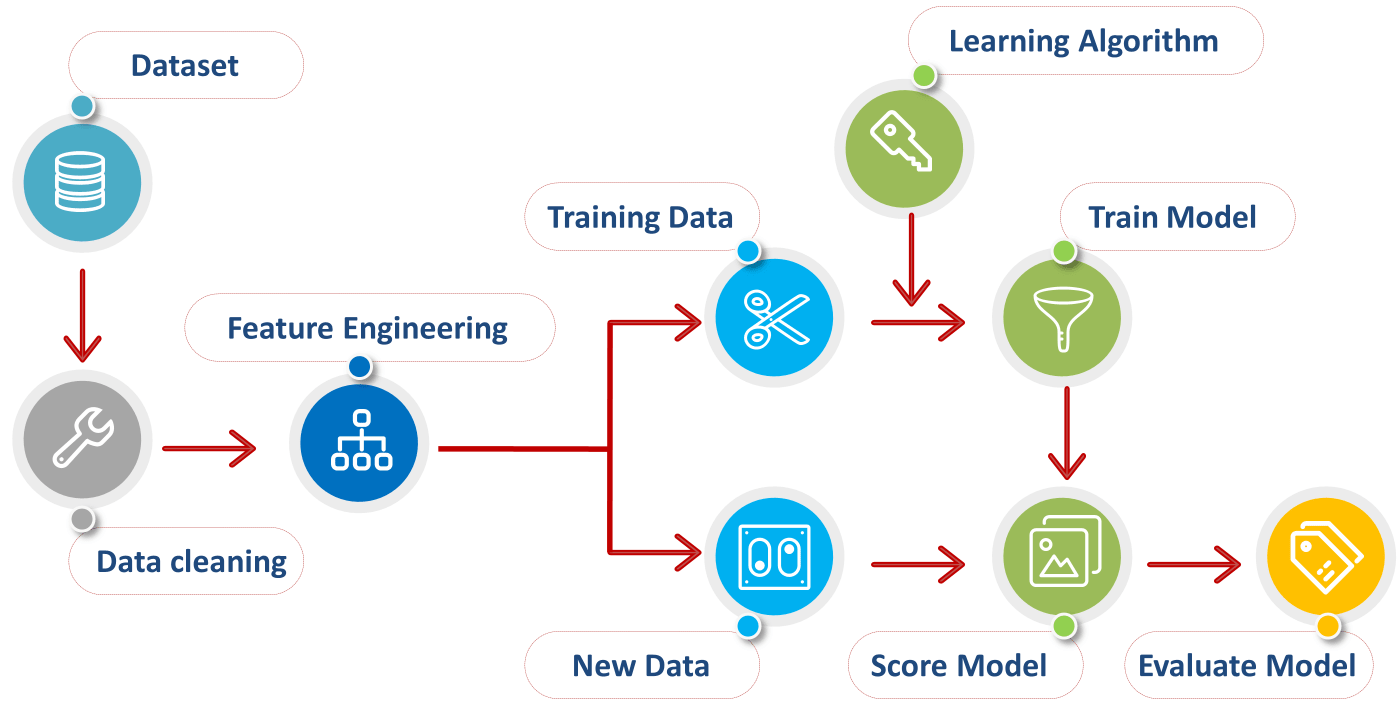

In [202]:
Image('dp.png')